## Top 311 calls 

in this case, we would like to filter top 10 days where there are the most calls for flood and sewer related complaints. Data we used are from NYC Open Data and filtered to only calls directed to DEP.

In [1]:
import pandas as pd
import geopandas as gpd
import pylab as pl

%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
# specifiy where the data is, in this case, it's in my folder duh
dataloc = 'C:/Users/Vivaldi Rinaldi/Documents/datapile/'

In [3]:
dep311 = pd.read_csv(dataloc + '311_Service_Requests_from_2010_to_Present_DEP.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dep311.columns = dep311.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
dep311.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'facility_type', 'status', 'due_date',
       'resolution_description', 'resolution_action_updated_date',
       'community_board', 'bbl', 'borough', 'x_coordinate_(state_plane)',
       'y_coordinate_(state_plane)', 'open_data_channel_type',
       'park_facility_name', 'park_borough', 'vehicle_type',
       'taxi_company_borough', 'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment',
       'latitude', 'longitude', 'location'],
      dtype='object')

In [28]:
dep311.descriptor.value_counts()

Noise: Construction Before/After Hours (NM1)                                                                182417
Sewer Backup (Use Comments) (SA)                                                                            128908
Leak (Use Comments) (WA2)                                                                                   119369
Hydrant Running Full (WA4)                                                                                   85537
Catch Basin Clogged/Flooding (Use Comments) (SC)                                                             79995
Hydrant Running (WC3)                                                                                        75898
Dirty Water (WE)                                                                                             74589
Noise, Barking Dog (NR5)                                                                                     64111
Noise: Construction Equipment (NC1)                                             

In [ ]:
'Noise: Construction Before/After Hours (NM1)'

'Leak (Use Comments) (WA2)'
'Hydrant Running Full (WA4)'
'Dirty Water (WE)'

In [8]:
dep311.complaint_type.unique()

array(['Sewer', 'Water System', 'Water Conservation', 'Industrial Waste',
       'Noise', 'Hazardous Materials', 'Lead', 'Air Quality', 'Asbestos',
       'Water Quality', 'ATF', 'Plant', 'Water Maintenance', 'FATF',
       'FHE', 'SRDE', 'SG-99', 'FCST', 'Hazardous Material', 'CST'],
      dtype=object)

In [10]:
sewer_data = dep311.loc[dep311['complaint_type']=='Sewer']

In [11]:
sewer_data.shape

(337651, 41)

In [15]:
sewer_data.descriptor.value_counts()

Sewer Backup (Use Comments) (SA)                                                                            128908
Catch Basin Clogged/Flooding (Use Comments) (SC)                                                             79995
Catch Basin Sunken/Damaged/Raised (SC1)                                                                      26233
Street Flooding (SJ)                                                                                         23004
Manhole Cover Broken/Making Noise (SB)                                                                       19220
Manhole Cover Missing (Emergency) (SA3)                                                                      15826
Sewer Odor (SA2)                                                                                             12660
Defective/Missing Curb Piece (SC4)                                                                            7958
Manhole Overflow (Use Comments) (SA1)                                           

In [16]:
sewer_data.descriptor.unique()

array(['Catch Basin Search (SC2)', 'Sewer Backup (Use Comments) (SA)',
       'Manhole Sunken/Damaged/Raised (SB1)', 'Street Flooding (SJ)',
       'Catch Basin Clogged/Flooding (Use Comments) (SC)',
       'Catch Basin Grating Missing (SA4)',
       'Manhole Cover Missing (Emergency) (SA3)',
       'Manhole Overflow (Use Comments) (SA1)', 'Sewer Odor (SA2)',
       'Defective/Missing Curb Piece (SC4)',
       'Catch Basin Sunken/Damaged/Raised (SC1)',
       'Manhole Cover Broken/Making Noise (SB)', 'Trench (SZZ1)',
       'Culvert Blocked/Needs Cleaning (SE)',
       'Plate Noisy/Sunken/Raised (SB5)',
       'Street Cave-In / Depression (SG)', 'Sewer Break (SBR)',
       'Highway Flooding (SH)', 'Plate Missing/Moved-Exposing Hole (SB4)',
       'DAMAGE STRUCTURE/RAILING (SRGDM)', 'RAIN GARDEN DEBRIS (SRGDBR)',
       'RAIN GARDEN FLOODING (SRGFLD)',
       'Recurring after SOAP *FOR DEP INTERNAL USE ONLY* (SRAS)',
       'SOAP segment *FOR DEP INTERNAL USE ONLY* (SOAP)  Recurring aft

#### So we'll be using these descriptor as a proxy to flooding

In [17]:
desc  =  ['Sewer Backup (Use Comments) (SA)', 
'Catch Basin Clogged/Flooding (Use Comments) (SC)',
'Street Flooding (SJ)']


In [26]:
sewer_data ["created_date"] = pd.to_datetime (sewer_data.created_date)

## not sure why i made this but oh well
sewer_data_2018 = sewer_data.loc [sewer_data.created_date.dt.year ==2018]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### See sandy related calls, 

In [31]:
sewer_data_2012 = sewer_data.loc [sewer_data.created_date.dt.year ==2012]


sewer_data_sandy = pd.concat([sewer_data_2012.loc [sewer_data_2012.created_date.dt.month == 10], 
                              sewer_data_2012.loc [sewer_data_2012.created_date.dt.month == 11]])

In [55]:
sandy = sewer_data_sandy.groupby([sewer_data_sandy.created_date.dt.date] ).count()
sandy['date'] = sandy.index
sandy = sandy[['date', 'unique_key']]

sandy.head()

,date,unique_key
created_date,,
2012-10-01,2012-10-01,85
2012-10-02,2012-10-02,112
2012-10-03,2012-10-03,112
2012-10-04,2012-10-04,136
2012-10-05,2012-10-05,94


### Use all sewer data

In [58]:
## specify i wanna use all sewer calls and count them by dates
sewr = sewer_data.groupby([sewer_data.created_date.dt.date] ).count()
sewr['date'] = sewr.index
sewr = sewr[['date', 'unique_key']]

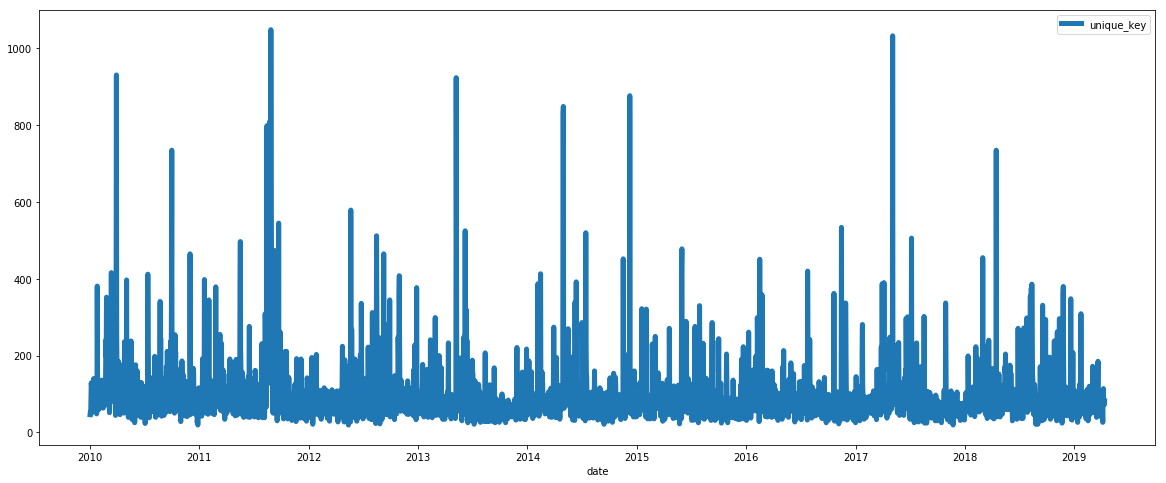

In [59]:
f, ax = pl.subplots(figsize=(20, 8))
sewr.plot(x='date', y='unique_key', linewidth=5, fontsize= 10,
                     ax = ax, grid=False, x_compat=True)

In [1]:
## Specify by the 3 Descriptors
sewerbackup = sewer_data.loc[sewer_data['descriptor']== 'Sewer Backup (Use Comments) (SA)']

streetflood = sewer_data.loc[sewer_data['descriptor']== 'Street Flooding (SJ)']

cloggedbasin = sewer_data.loc[sewer_data['descriptor']== 'Catch Basin Clogged/Flooding (Use Comments) (SC)']

## OKAY I ACCIDENTALLY RUN THIS WHEN COMMENTING
## DONT WORRY IT WORKS K

NameError: name 'sewer_data' is not defined

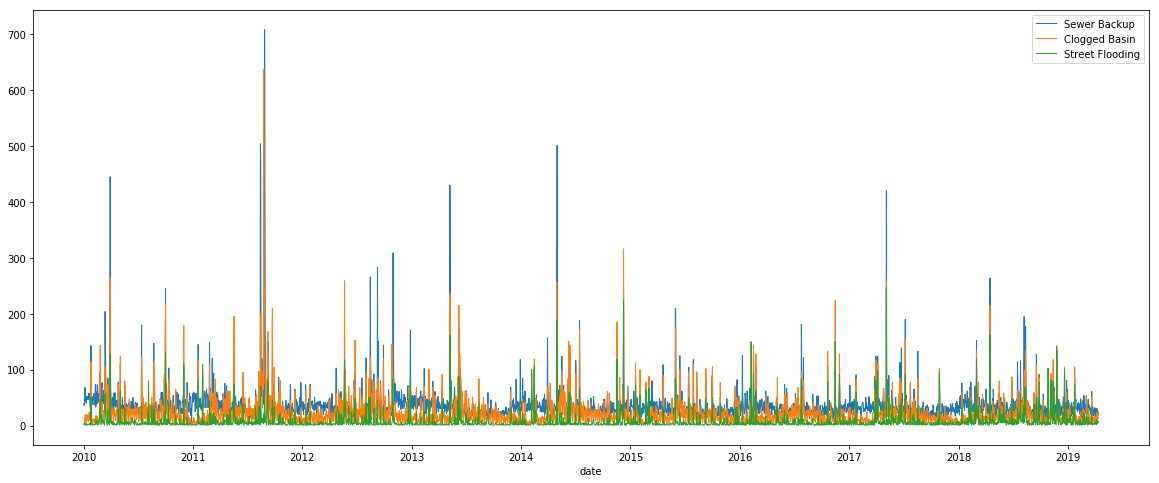

In [66]:
## Count each 
sewr = sewerbackup.groupby([sewerbackup.created_date.dt.date] ).count()
sewr['date'] = sewr.index
sewr = sewr[['date', 'unique_key']]

sewr1 = streetflood.groupby([streetflood.created_date.dt.date] ).count()
sewr1['date'] = sewr1.index
sewr1 = sewr1[['date', 'unique_key']]

sewr2 = cloggedbasin.groupby([cloggedbasin.created_date.dt.date] ).count()
sewr2['date'] = sewr2.index
sewr2 = sewr2[['date', 'unique_key']]


## PLOT
f, ax = pl.subplots(figsize=(20, 8))
sewr.plot(x='date', y='unique_key', linewidth=1, fontsize= 10,
                     ax = ax, grid=False, x_compat=True, label = 'Sewer Backup')
sewr2.plot(x='date', y='unique_key', linewidth=1, fontsize= 10,
                     ax = ax, grid=False, x_compat=True, label = 'Clogged Basin')
sewr1.plot(x='date', y='unique_key', linewidth=1, fontsize= 10,
                     ax = ax, grid=False, x_compat=True, label = 'Street Flooding')

### Get the top 10 Days

In [81]:
# backup
sb10 = sewr.sort_values(by = ['unique_key'], ascending = False).head(10)
sb10

,date,unique_key
created_date,,
2011-08-28,2011-08-28,708
2011-08-14,2011-08-14,504
2014-05-01,2014-05-01,501
2011-08-15,2011-08-15,469
2010-03-30,2010-03-30,445
2013-05-08,2013-05-08,430
2011-08-29,2011-08-29,420
2017-05-05,2017-05-05,420
2014-04-30,2014-04-30,314


In [74]:
# street flooding
sf10 = sewr1.sort_values(by = ['unique_key'], ascending = False).head(10)
sf10 

,date,unique_key
created_date,,
2017-05-05,2017-05-05,247
2014-12-09,2014-12-09,226
2014-04-30,2014-04-30,189
2018-04-16,2018-04-16,163
2013-05-08,2013-05-08,162
2016-11-15,2016-11-15,151
2016-02-08,2016-02-08,150
2018-11-25,2018-11-25,142
2010-10-01,2010-10-01,130


In [73]:
# clogged basin 
cb10 = sewr2.sort_values(by = ['unique_key'], ascending = False).head(10)
cb10

,date,unique_key
created_date,,
2011-08-25,2011-08-25,637
2011-08-26,2011-08-26,395
2014-12-09,2014-12-09,316
2010-03-30,2010-03-30,265
2012-05-21,2012-05-21,259
2014-04-30,2014-04-30,257
2017-05-05,2017-05-05,257
2011-08-28,2011-08-28,249
2013-05-08,2013-05-08,237


#### Basically we want to filter by the date above

In [77]:
sb10f = pd.DataFrame()

for i in sb10.date:
    sb10f = sb10f.append(sewerbackup.loc[sewerbackup.created_date.dt.date == i], ignore_index = True)
    

In [82]:
cb10f = pd.DataFrame()

for i in cb10.date:
    cb10f = cb10f.append(cloggedbasin.loc[cloggedbasin.created_date.dt.date == i], ignore_index = True)

In [83]:
sf10f = pd.DataFrame()

for i in sf10.date:
    sf10f = sf10f.append(streetflood.loc[streetflood.created_date.dt.date == i], ignore_index = True)

In [86]:
# make these a CSV
sb10f.to_csv('sewerBackup10f.csv')
sf10f.to_csv('streetFlooding10f.csv')
cb10f.to_csv('cloggedBasin10f.csv')

In [30]:
len(sewer_data.created_date.dt.year.unique())

10

In [27]:
# 
for i in desc:
    data = sewer_data_2018.loc[sewer_data['descriptor']== i]
    filenames = i.replace(' ', '')
    filenames = filenames.replace('/', '')
    data.to_csv(filenames + '_2018.csv')
    